In [1]:
# basic
import sys
import os
import os.path as op

# common
import numpy as np
import pandas as pd
import xarray as xr
import datetime

# plotting
import matplotlib.pyplot as plt

# warnings
import warnings
warnings.filterwarnings("ignore")

# custom
import spectra_functions as specfun

In [2]:
p_data = op.join(os.getcwd(), '..', 'data')

# -------------- EDIT THIS PART --------------------------------------------- #
name = 'SAF' # used name in the SWAN section
# --------------------------------------------------------------------------- #

partitions = pd.read_pickle(op.join(p_data, 'reconstructed',
                                    'reconstructed_partitioned_'+name+'.pkl'))[::1000]
print(partitions.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 1979-01-01 01:00:00 to 2020-01-26 01:00:00
Freq: 1000H
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Hsea       178 non-null    float64
 1   Tpsea      178 non-null    float64
 2   Dirsea     178 non-null    float64
 3   Sprsea     178 non-null    float64
 4   Hswell1    308 non-null    float64
 5   Tpswell1   308 non-null    float64
 6   Dirswell1  308 non-null    float64
 7   Sprswell1  308 non-null    float64
 8   Hswell2    129 non-null    float64
 9   Tpswell2   129 non-null    float64
 10  Dirswell2  129 non-null    float64
 11  Sprswell2  129 non-null    float64
 12  Hswell3    40 non-null     float64
 13  Tpswell3   40 non-null     float64
 14  Dirswell3  40 non-null     float64
 15  Sprswell3  40 non-null     float64
 16  Tm_02      361 non-null    float64
dtypes: float64(17)
memory usage: 50.8 KB
None


In [ ]:
## -------------- RUN THIS PART FOR DAILY HOURS ----------------------------- #
#dates = np.arange(datetime.datetime(1979,1,1), datetime.datetime(2020,2,29), 
#                  datetime.timedelta(hours=1))
#daylight_dates = []
#for date in dates:
#    if int(str(date)[5:7])<4 or int(str(date)[5:7])>9:
#        if int(str(date)[11:13])>8 and int(str(date)[11:13])<18:
#            daylight_dates.append(date)
#    else:
#        if int(str(date)[11:13])>7 and int(str(date)[11:13])<20:
#            daylight_dates.append(date)
#partitions = partitions.loc[daylight_dates][::3]
## -------------------------------------------------------------------------- #

In [ ]:
# If example data wants to be tested, please use this dataframe below!!!

# ---------------------- TEST WAVE CONDITIONS ------------------------------- #
test = pd.DataFrame({'Hsea':      [1.2,    1.5,    1.7,    2.6],
                     'Tpsea':     [8.1,    8.8,    18,     18],
                     'Dirsea':    [70.3,   90,    345,    70],
                     'Sprsea':    [25.5,   30,     15,     30],
                     'Hswell1':   [2.0,    2.5,    np.nan, np.nan],
                     'Tpswell1':  [15.82,  18,     np.nan, np.nan],
                     'Dirswell1': [350.6,  355,    np.nan, np.nan],
                     'Sprswell1': [10.1,   10,     np.nan, np.nan],
                     'Hswell2':   [0.8,    0.8,    np.nan, np.nan],
                     'Tpswell2':  [19.52,  18,     np.nan, np.nan],
                     'Dirswell2': [240.3,  180,    np.nan, np.nan],
                     'Sprswell2': [6.56,   12,     np.nan, np.nan],
                     'Hswell3':   [np.nan, np.nan, np.nan, np.nan],
                     'Tpswell3':  [np.nan, np.nan, np.nan, np.nan],
                     'Dirswell3': [np.nan, np.nan, np.nan, np.nan],
                     'Sprswell3': [np.nan, np.nan, np.nan, np.nan],
                     'Tm_02':     [12,     13,     16,     14]})
gamma_values = [[3, 3, 3, 3],
                [10, 10, 10, 10],
                [10, 10, 10, 10],
                [10, 10, 10, 10]]
print(test.info())
# --------------------------------------------------------------------------- #

In [3]:
print('Creating spectrums and elevations...')
print('--------------------------------------------')

# A maximum of 400 data can be spectrally analyzed at the same time

# Change partitions by test if wanted!!

timesteps = 2
timestep  = int(len(partitions)/timesteps)
for ts in range(timesteps):
    print('Group number {}...'.format(ts+1))
    print('--------------------------------------------')
    ts_spec = specfun.spectra(partitions.iloc[ts*timestep:(ts+1)*timestep],
                              gamma_values=False)
    ts_spec = ts_spec.sum(dim='partition')
    if ts==0:
        specs = ts_spec
    else:
        specs = xr.concat([specs, ts_spec], dim='time')
        #specs.to_netcdf(op.join(p_data, 'reconstructed', 
        #                        'spectra_'+name+'.pkl'))
    print('{} joined...'.format((ts+1)*timestep))
    print('--------------------------------------------')

Creating spectrums and elevations...
--------------------------------------------
Group number 1...
--------------------------------------------
--------------------------------------------
180 sea states will be analyzed...
--------------------------------------------
Calculating partition 0...
--------------------------------------------
Calculating partition 1...
--------------------------------------------
Calculating partition 2...
--------------------------------------------
Calculating partition 3...
--------------------------------------------
Concatinating final spectrums in groups of 20...
180 joined...
--------------------------------------------
Group number 2...
--------------------------------------------
--------------------------------------------
180 sea states will be analyzed...
--------------------------------------------
Calculating partition 0...
--------------------------------------------
Calculating partition 1...
--------------------------------------------
Ca

In [4]:
print(specs)

<xarray.DataArray 'efth' (freq: 60, dir: 60, time: 360)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.40355009e-28, 3.75159520e-15],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.21348414e-26, 2.48683256e-14],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.04323349e-24, 1.35141481e-13],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.40455253e-22, 9.28950869e-12],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2

Plotting 4 out of 360 spectrums... 

Plotting specs: [10, 150, 160, 34]


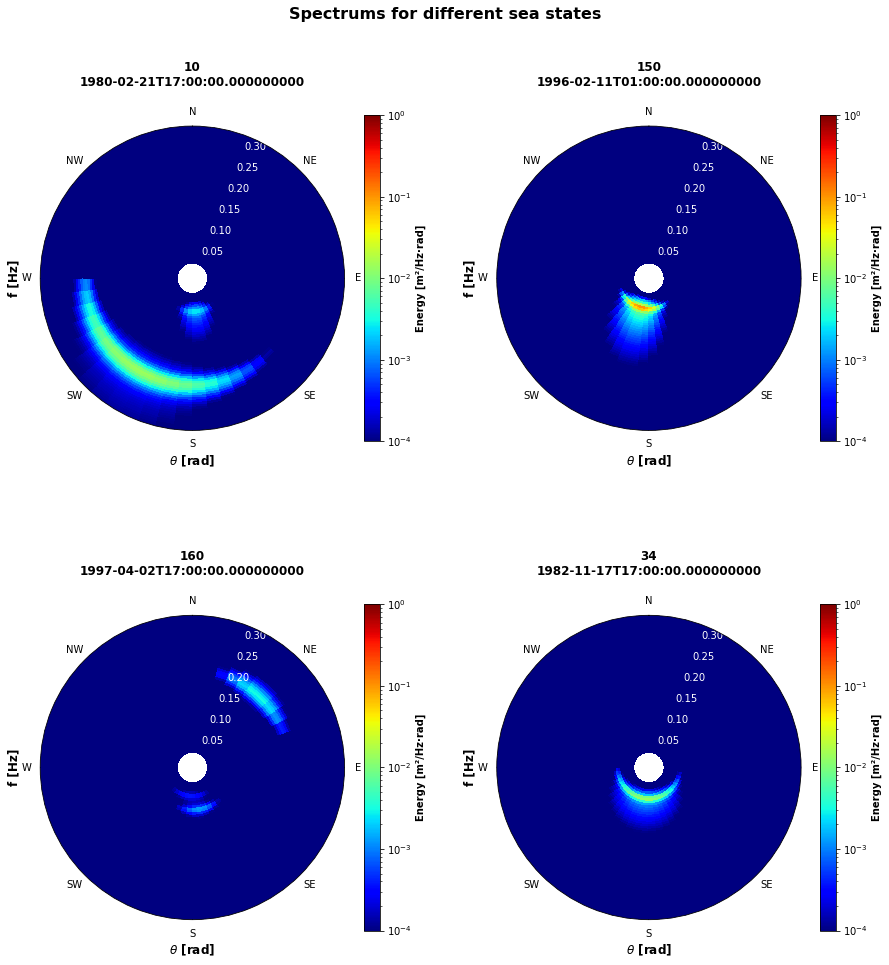

In [5]:
# Plot the obtained spectra now
specs_plotted = specfun.plot_spectrum(specs, time_plots=[10,150,160,34])

In [6]:
# Select 1 so just one image will be plotted (recommended)
time_waves = 5

# A GIF is automatically generated for the more than 1 case
gif_path = op.join(p_data, '..', 'images', 'elevations')

for surf in range(len(specs_plotted)):
    print('--------------------------------------------')
    print('{} surface plotted...'.format(surf))
    print('--------------------------------------------')
    spec_to_elev = specs.sel(time=specs_plotted[surf])
    for tw in range(time_waves):
        elev = specfun.surface(spec_to_elev, t=tw)
        if tw==0:
            elevs = elev
        else:
            elevs = xr.concat([elevs, elev], dim='time')
    new_path = op.join(gif_path, str(surf))
    os.mkdir(new_path)
    specfun.plot_surface(elevs, new_path, specs_plotted[surf])
    
print('Well done dude!')

--------------------------------------------
0 surface plotted...
--------------------------------------------
--------------------------------------------
Calculating the sea elevation for time 0...
--------------------------------------------
Amplitude mean before selection: 0.0001561804073603773
Amplitude mean after selection: 0.0005757468767757123
--------------------------------------------
0% completed...
0.0 minutes transcurred...
--------------------------------------------
10% completed...
0.0 minutes transcurred...
--------------------------------------------
20% completed...
0.0 minutes transcurred...
--------------------------------------------
30% completed...
0.0 minutes transcurred...
--------------------------------------------
40% completed...
0.0 minutes transcurred...
--------------------------------------------
50% completed...
0.01 minutes transcurred...
--------------------------------------------
60% completed...
0.01 minutes transcurred...
----------------------

70% completed...
0.01 minutes transcurred...
--------------------------------------------
80% completed...
0.01 minutes transcurred...
--------------------------------------------
90% completed...
0.01 minutes transcurred...
--------------------------------------------
--------------------------------------------
Calculating the sea elevation for time 2...
--------------------------------------------
Amplitude mean before selection: 0.00012525854826906304
Amplitude mean after selection: 0.0007619251811216276
--------------------------------------------
0% completed...
0.0 minutes transcurred...
--------------------------------------------
10% completed...
0.0 minutes transcurred...
--------------------------------------------
20% completed...
0.0 minutes transcurred...
--------------------------------------------
30% completed...
0.0 minutes transcurred...
--------------------------------------------
40% completed...
0.0 minutes transcurred...
------------------------------------------

50% completed...
0.01 minutes transcurred...
--------------------------------------------
60% completed...
0.01 minutes transcurred...
--------------------------------------------
70% completed...
0.02 minutes transcurred...
--------------------------------------------
80% completed...
0.02 minutes transcurred...
--------------------------------------------
90% completed...
0.02 minutes transcurred...
--------------------------------------------
--------------------------------------------
Calculating the sea elevation for time 4...
--------------------------------------------
Amplitude mean before selection: 5.995712497803543e-05
Amplitude mean after selection: 0.00012014458107088917
--------------------------------------------
0% completed...
0.0 minutes transcurred...
--------------------------------------------
10% completed...
0.0 minutes transcurred...
--------------------------------------------
20% completed...
0.0 minutes transcurred...
----------------------------------------

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

In [7]:
# Spectra module 
from wavespectra.specarray import SpecArray
from wavespectra.specdataset import SpecDataset

In [8]:
specs.spec

<SpecArray 'efth' (freq: 60, dir: 60, time: 360)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.40355009e-28, 3.75159520e-15],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.21348414e-26, 2.48683256e-14],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.04323349e-24, 1.35141481e-13],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.40455253e-22, 9.28950869e-12],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.215065

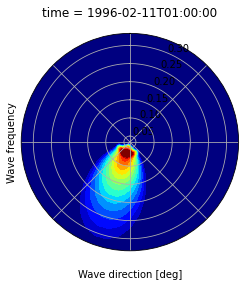

In [9]:
specs.isel(time=150).spec.plot.contourf(
    cmap="jet",
    vmin=-5,
    vmax=-2,
    levels=15,
    add_colorbar=False,
)

In [10]:
time = specs.time.values

In [11]:
hs = specs.spec.hs().values

In [12]:
tm = specs.spec.tm01().values

In [13]:
tp = specs.spec.tp().values

In [14]:
dm = specs.spec.dm().values

In [15]:
spr = specs.spec.dspr().values

In [16]:
save = pd.DataFrame(data={'Hs_Spec': hs,
                          'Tm_Spec': tm,
                          'Tp_Spec': tp,
                          'Dir_Spec': dm,
                          'Spr_Spec': spr}, index=time)

In [17]:
save

,Hs_Spec,Tm_Spec,Tp_Spec,Dir_Spec,Spr_Spec
1979-01-01 01:00:00,0.000000,NaN,NaN,270.000000,NaN
1979-02-11 17:00:00,0.000000,NaN,NaN,270.000000,NaN
1979-03-25 09:00:00,0.305080,4.186334,4.235694,190.780270,23.272567
1979-05-06 01:00:00,0.134841,7.767705,8.006085,210.055005,18.088461
1979-06-16 17:00:00,0.226642,9.899325,10.936614,204.723403,25.779522
...,...,...,...,...,...
2019-07-01 17:00:00,0.354718,4.958596,5.059939,51.212189,12.432011
2019-08-12 09:00:00,0.106419,7.572961,8.639847,183.930872,15.168686
2019-09-23 01:00:00,0.000000,NaN,NaN,270.000000,NaN
2019-11-03 17:00:00,0.996392,12.219598,13.191527,181.017576,11.616656


In [18]:
save.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 360 entries, 1979-01-01 01:00:00 to 2019-12-15 09:00:00
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hs_Spec   360 non-null    float64
 1   Tm_Spec   314 non-null    float64
 2   Tp_Spec   311 non-null    float64
 3   Dir_Spec  360 non-null    float64
 4   Spr_Spec  314 non-null    float64
dtypes: float64(5)
memory usage: 16.9 KB


In [19]:
save.to_csv(op.join(p_data, 'spectra', 'spectra_'+name+'.pkl'))